In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [6]:
# generates random numbers from [0,1]
(a, c, m, x) = (2057, 1345, pow(2, 50), 3245)
def uniform():
    global x
    x = (a * x + c) % m 
    return x/m

In [7]:
# generates normal distribution with mean μ and standard deviation σ
def BoxMuller(μ,σ):
    R = np.sqrt(-2*np.log(uniform()))
    θ = 2*np.pi*uniform()
    return μ + σ*R*np.sin(θ)

E[X(2)] = 5.247139255927944
E[X(5)] = 5.570387328948144


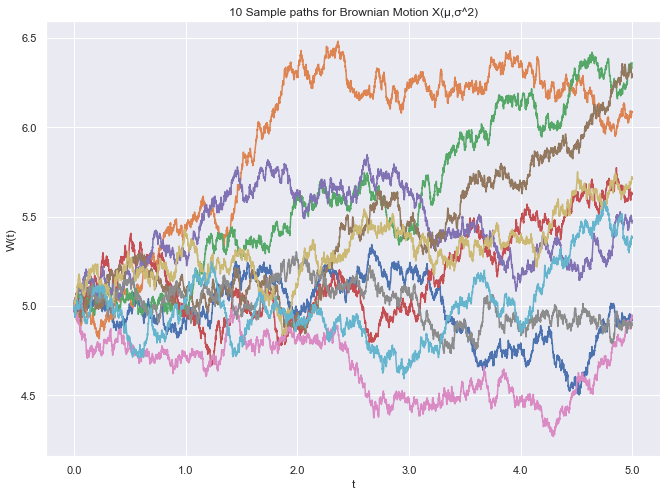

In [13]:
N = 5000
time_step = 5/N
μ = 0.06
σ = 0.3

# for calculating E[W(2)] and E[W(5)]
s1 = 0
s2 = 0

# setting plot size
plt.figure(figsize=(11, 8))

# generating W(t) with time step(ti+1- ti) as 1/1000
for i in range(10):
    X = []
    X.append(5)
    for j in range(1,N):
        val = X[j-1] + μ*time_step + σ*np.sqrt(time_step)*BoxMuller(0,1)
        if j == 1999:
            s1 += val
        if j == 4999:
            s2 += val
        X.append(val)
    plt.plot(X)

print(f'E[X(2)] = {s1/10}')
print(f'E[X(5)] = {s2/10}')
    
# making the plot
X_ticks = [i*1000 for i in range(6)]
time = [i/1000 for i in X_ticks]
plt.xticks(X_ticks, time)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('10 Sample paths for Brownian Motion X(μ,σ^2)')
plt.show()